In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
sys.setrecursionlimit(10**7)

In [30]:
def sort_checker(L):
    n=len(L)
    for i in range(1,n):
        if L[i-1]>L[i]:
            return False
    return True
def swap(L,a,b):
    s=L[a]
    L[a]=L[b]
    L[b]=s
    return
    
def bubble_sort(L):
    n=len(L)
    for i in range(n):
        for j in range(1,n-i):
            if L[j-1]>L[j]:
                swap(L,j-1,j)
    return L

def min_index(L,j):
    s=10**9
    n=j
    for i in range(j,len(L)):
        if s> L[i]:
            s=L[i]
            n=i
    return n

def selection_sort(L):
    for i in range(len(L)):
        s=min_index(L,i)
        swap(L,i,s)
    return L

def intersection_sort(L):
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            if L[j]<L[j-1]:
                swap(L,j,j-1)
    return L


def merge(L,left,mid,right):
    if mid >= right:
         return L
    M=[0]*(right-left)
    i=left
    j=mid
    s=0
    while (i<mid) and (j < right):
        if L[i]<=L[j]:
            M[s]=L[i]
            i+=1
        else:
            M[s]=L[j]
            j+=1
        s+=1
    if i==mid:
        for t in range(j,right):
            M[s]=L[t]
            s+=1
    if j==right:
        for t in range(i,mid):
            M[s]=L[t]
            s+=1
    for t in range(left,right):
        L[t]=M[t-left]
    return L
    
def merge_sort(L):
    n=len(L)
    t=1
    while 2**t <= n:
        left=0
        right=2**t
        mid=2**(t-1)
        while left<n:
            L=merge(L,left,mid,right)
            left+=2**t
            mid+=2**t
            right+=2**t
            right=min(right,n)
        t+=1
    merge(L,0,2**(t-1),n)
    return L

def quick_sort(L,left,right):
    #print(L)
    if right-left<=1:
        return
    if right-left==2:
        if L[left+1]<L[left]:
            swap(L,left,left+1)
        return
    mid=(right+left)//2
    s=L[mid]
    i=left
    j=right-1
    while True:
        while L[i]<s:
            i+=1
        while L[j]>s:
            j-=1
        if i>=j:
            break
        swap(L,i,j)
        i+=1
        j-=1
    quick_sort(L,left,i)
    quick_sort(L,j+1,right)
    return 
    

        

In [49]:
def bubble_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(n):
        for j in range(1,n-i):
            if L[j-1]>L[j]:
                swap(L,j-1,j)
            ##im = plt.plot(np.array(L)) 
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_bubble.gif", writer="imagemagick")
    plt.show()
    return L


def selection_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(len(L)):
        s=min_index(L,i)
        swap(L,i,s)
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_selection.gif", writer="imagemagick")
    plt.show()
    return L

def intersection_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            if L[j]<L[j-1]:
                swap(L,j,j-1)
        im = plt.bar(X,np.array(L),color='k') 
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_intersection.gif", writer="imagemagick")
    plt.show()        
    return L
  
def merge_sort_anime(L):
    fig = plt.figure()
    ims=[]   
    n=len(L)
    X=np.arange(1,n+1)
    t=1
    while 2**t <= n:
        left=0
        right=2**t
        mid=2**(t-1)
        while left<n:
            L=merge(L,left,mid,right)
            left+=2**t
            mid+=2**t
            right+=2**t
            right=min(right,n)
            im = plt.bar(X,np.array(L),color='k') 
            ims.append(im)
        t+=1
    merge(L,0,2**(t-1),n)
    im = plt.bar(X,np.array(L),color='k') 
    ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save("sort_merge.gif", writer="imagemagick")
    plt.show()      
    return L 

def quick_sort_anime(L,left,right):
    im = plt.bar(X,np.array(L),color='k') 
    ims.append(im)
    if right-left<=1:
        return
    if right-left==2:
        if L[left+1]<L[left]:
            swap(L,left,left+1)
        return
    mid=(right+left)//2
    s=L[mid]
    i=left
    j=right-1
    while True:
        while L[i]<s:
            i+=1
        while L[j]>s:
            j-=1
        if i>=j:
            break
        swap(L,i,j)
        i+=1
        j-=1
    quick_sort_anime(L,left,i)
    quick_sort_anime(L,j+1,right)
    return 
        

MovieWriter imagemagick unavailable.


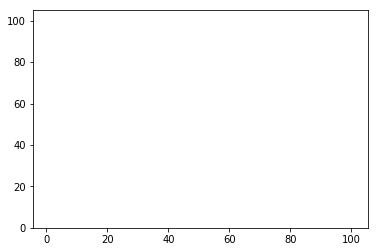

In [50]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
bubble_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


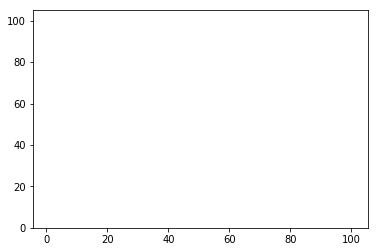

In [51]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
selection_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


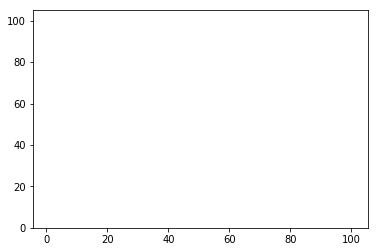

In [52]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
intersection_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


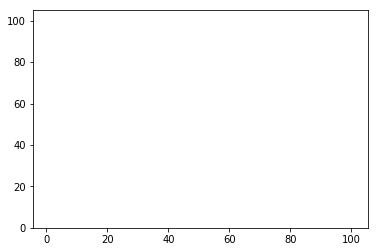

In [53]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
merge_sort_anime(L)
print()

MovieWriter imagemagick unavailable.


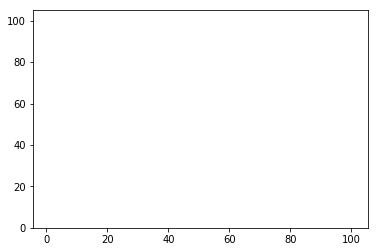

In [54]:
N=100
L=[i+1 for i in range(N)]
random.shuffle(L)
fig = plt.figure()
ims=[]   
X=np.arange(1,N+1)
quick_sort_anime(L,0,N)
ani = animation.ArtistAnimation(fig, ims, interval=100)
ani.save("sort_quick.gif", writer="imagemagick")
plt.show() 